In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import contextily as ctx
from us_census_api_py import wac_tiger


In [2]:
data = wac_tiger(year=2020, geoids="08059,08091")

100%|██████████| 1/1 [00:48<00:00, 0.02it/s]█| 2/2 [00:01<00:00, 1.33it/s]



result has 93142, 0, 0


In [13]:
df = pd.DataFrame.from_dict(data, orient='index')
df['geometry'] = df.geometry.apply(wkt.loads)
df = gpd.GeoDataFrame(df, crs="EPSG:4326")



In [5]:
# df = pd.read_csv("../LODES8_wac_2020_JT00_S000_census_tract.csv")
df["geometry"] = df.geometry.apply(wkt.loads)
df = gpd.GeoDataFrame(df, crs="EPSG:4326")

In [15]:
df.value.sum()

np.float64(2536994.0)

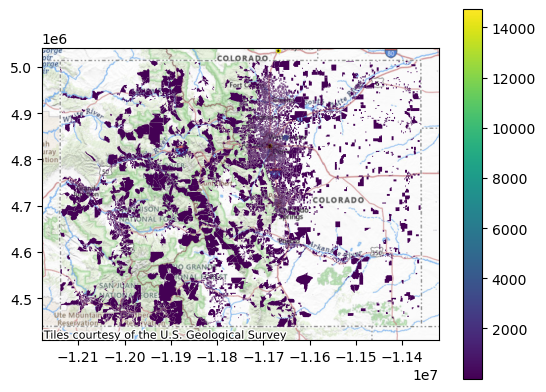

In [18]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots()
df.to_crs("EPSG:3857").plot("value", legend=True, ax=ax)
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo)